<a href="https://colab.research.google.com/github/luciekiss/GSWS-site/blob/main/Case_Comp_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Case_Data.csv")
data.head()

,Unnamed: 0,Age,Gender,Marital Status,Number of Dependents,Income ($),Employment,Homeownership duration (yrs),Home insurance tenure (yrs),Has a mortgage?,...,Number of car accidents,Car Value ($),Car coverage,Number of covered drivers,Annual car insurance premium,Number of website logins (past year),Called service center? (past year),Opened marketing email? (past year),Family with life policies?,Life Insurance Cross-sell indicator
0,0,52,Male,Other,1,120942,Retired,10,10,Yes,...,4,38202,Comprehensive,1,2352,2,Yes,Yes,No,1
1,1,37,Male,Married,1,124370,Employed,18,17,Yes,...,1,33038,Collision,2,2429,2,No,No,No,0
2,2,50,Female,Other,1,83458,Employed,10,10,Yes,...,3,15869,All Perils,2,2072,2,Yes,Yes,Yes,1
3,3,41,Male,Married,4,93070,Employed,18,6,No,...,3,28011,Comprehensive,2,1977,6,Yes,No,Yes,0
4,4,62,Female,Married,3,98553,Employed,30,30,Yes,...,3,34037,Comprehensive,1,2647,2,No,Yes,No,1


In [ ]:
life_crosssell_ratio = data['Life Insurance Cross-sell indicator'].value_counts() / len(data)
life_crosssell_ratio

,count
Life Insurance Cross-sell indicator,
0,0.580816
1,0.419184


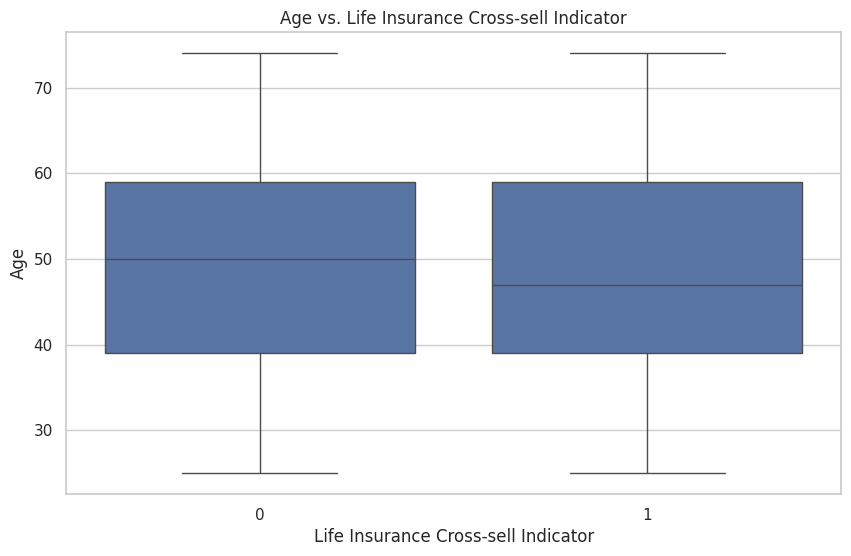

In [ ]:
# 1. Age vs. Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x="Life Insurance Cross-sell indicator", y="Age", data=data)
plt.title("Age vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Life Insurance Cross-sell Indicator")
plt.ylabel("Age")
plt.show()

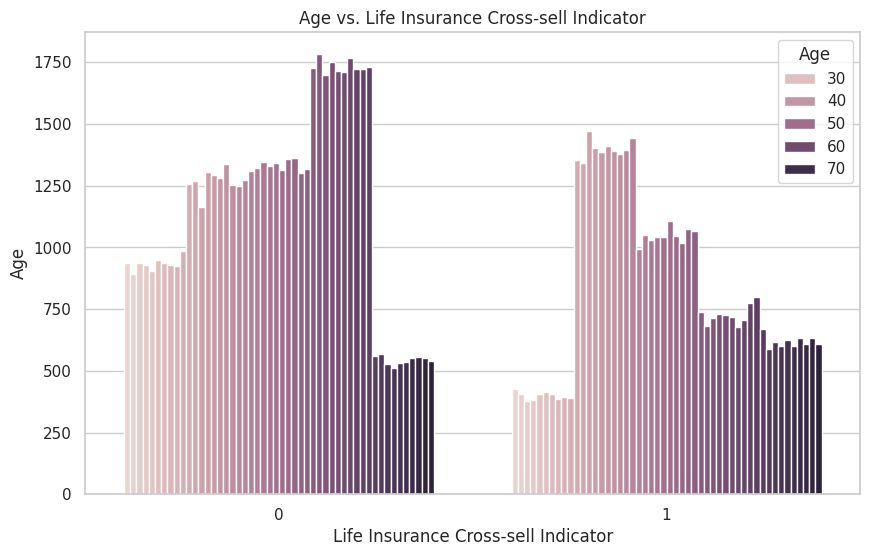

In [ ]:
# 1. Age vs. Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.countplot(x="Life Insurance Cross-sell indicator", hue="Age", data=data)
plt.title("Age vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Life Insurance Cross-sell Indicator")
plt.ylabel("Age")
plt.show()

<ipython-input-24-89f5a3c379b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Life Insurance Cross-sell indicator", y="Income ($)", data=data, palette="Purples")


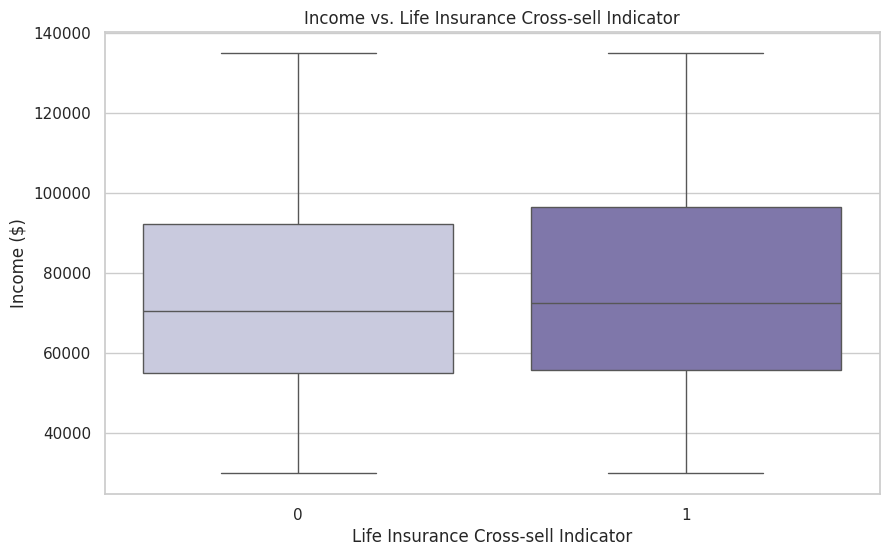

In [ ]:
# 2. Income vs. Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x="Life Insurance Cross-sell indicator", y="Income ($)", data=data, palette="Purples")
plt.title("Income vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Life Insurance Cross-sell Indicator")
plt.ylabel("Income ($)")
plt.show()

<ipython-input-25-076797ec5ce6>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_crosssell_counts = data.groupby(['Income Range', 'Life Insurance Cross-sell indicator']).size().unstack(fill_value=0)


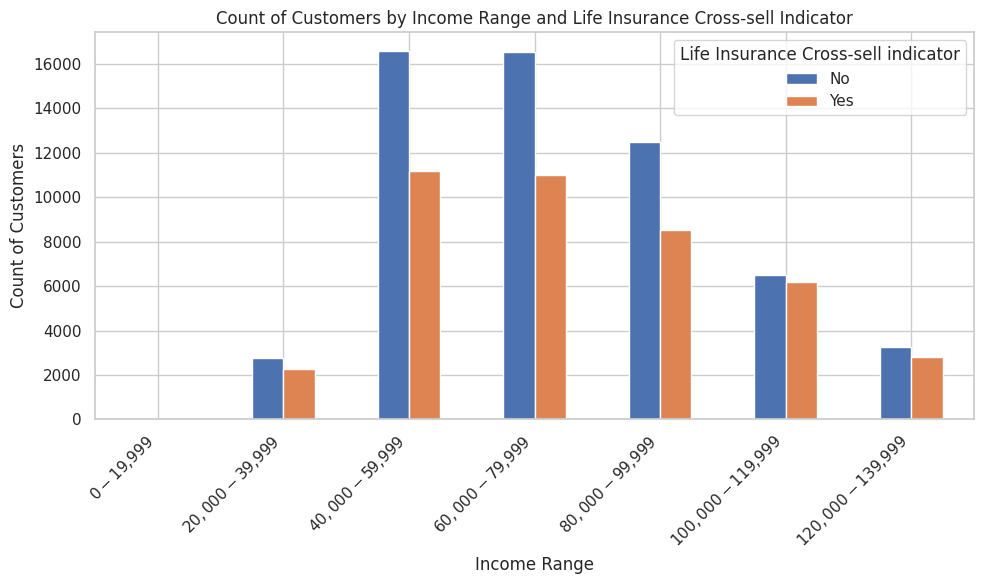

In [ ]:
# Create income ranges in intervals of $20,000
income_bins = range(0, int(data['Income ($)'].max()) + 20000, 20000)
income_labels = [f"${i:,} - ${i + 19999:,}" for i in income_bins[:-1]]

# Assign the income categories to the dataset
data['Income Range'] = pd.cut(data['Income ($)'], bins=income_bins, labels=income_labels, right=False)

# Group by the income range and life insurance cross-sell indicator, and count the occurrences
income_crosssell_counts = data.groupby(['Income Range', 'Life Insurance Cross-sell indicator']).size().unstack(fill_value=0)


# Plotting the counts
income_crosssell_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Count of Customers by Income Range and Life Insurance Cross-sell Indicator')
plt.xlabel('Income Range')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Life Insurance Cross-sell indicator', labels=['No', 'Yes'])
plt.tight_layout()


# Display the plot
plt.show()

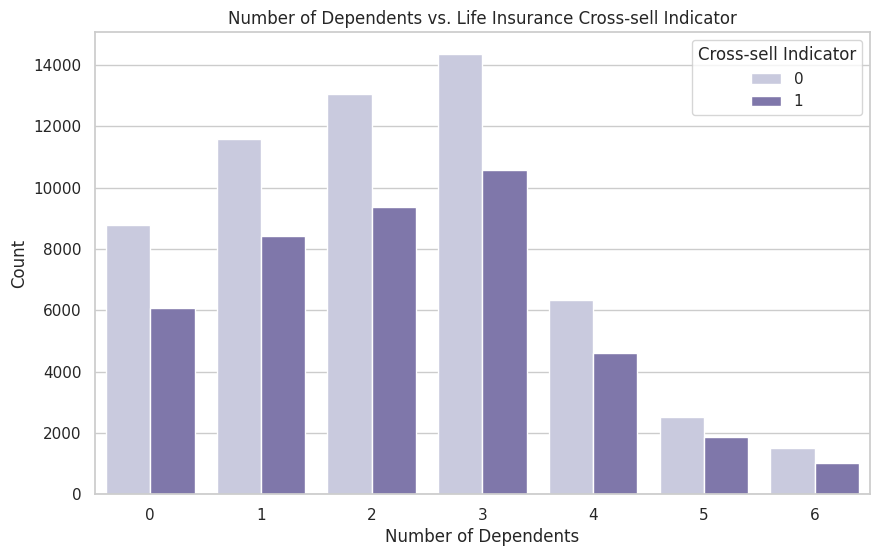

In [ ]:
# 3. Number of Dependents vs. Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.countplot(x="Number of Dependents", hue="Life Insurance Cross-sell indicator", data=data, palette="Purples")
plt.title("Number of Dependents vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.legend(title="Cross-sell Indicator", loc="upper right")
plt.show()

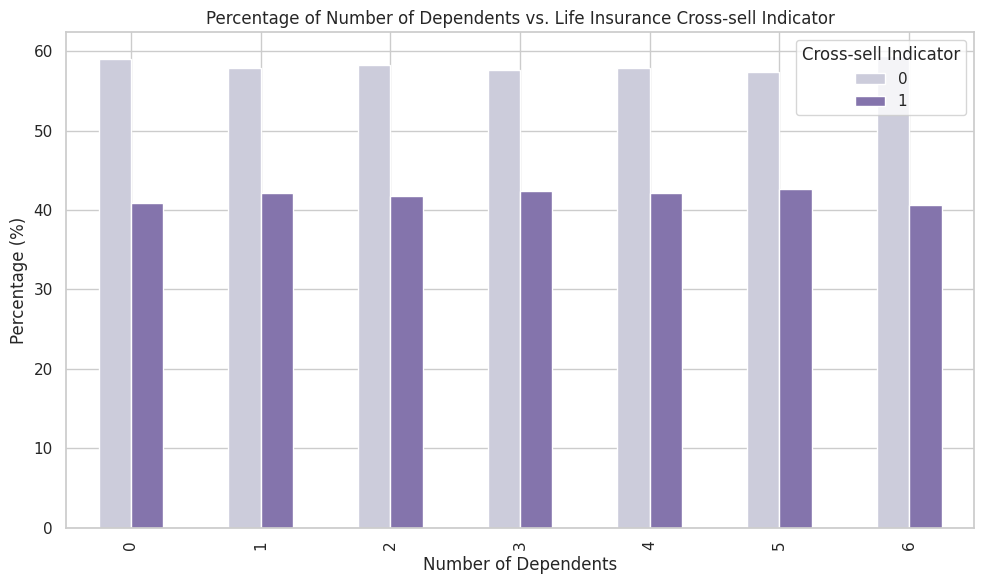

In [ ]:
import seaborn as sns

# Create a crosstab of "Number of Dependents" vs "Life Insurance Cross-sell indicator"
dependents_cross_sell = pd.crosstab(data['Number of Dependents'], data['Life Insurance Cross-sell indicator'])

# Calculate the percentage by dividing by the row totals and multiplying by 100
dependents_cross_sell_percentage = dependents_cross_sell.div(dependents_cross_sell.sum(axis=1), axis=0) * 100

# Plot the percentage for each number of dependents
plt.figure(figsize=(10, 6))
dependents_cross_sell_percentage.plot(kind='bar', stacked=False, color=['#ccccdb', '#8474ac'], ax=plt.gca())
plt.title("Percentage of Number of Dependents vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Number of Dependents")
plt.ylabel("Percentage (%)")
plt.legend(title="Cross-sell Indicator", loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
# 4. Homeownership Duration vs. Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x="Life Insurance Cross-sell indicator", y="Homeownership duration (yrs)", data=data, palette="Purples")
plt.title("Homeownership Duration vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Life Insurance Cross-sell Indicator")
plt.ylabel("Homeownership Duration (Years)")
plt.show()

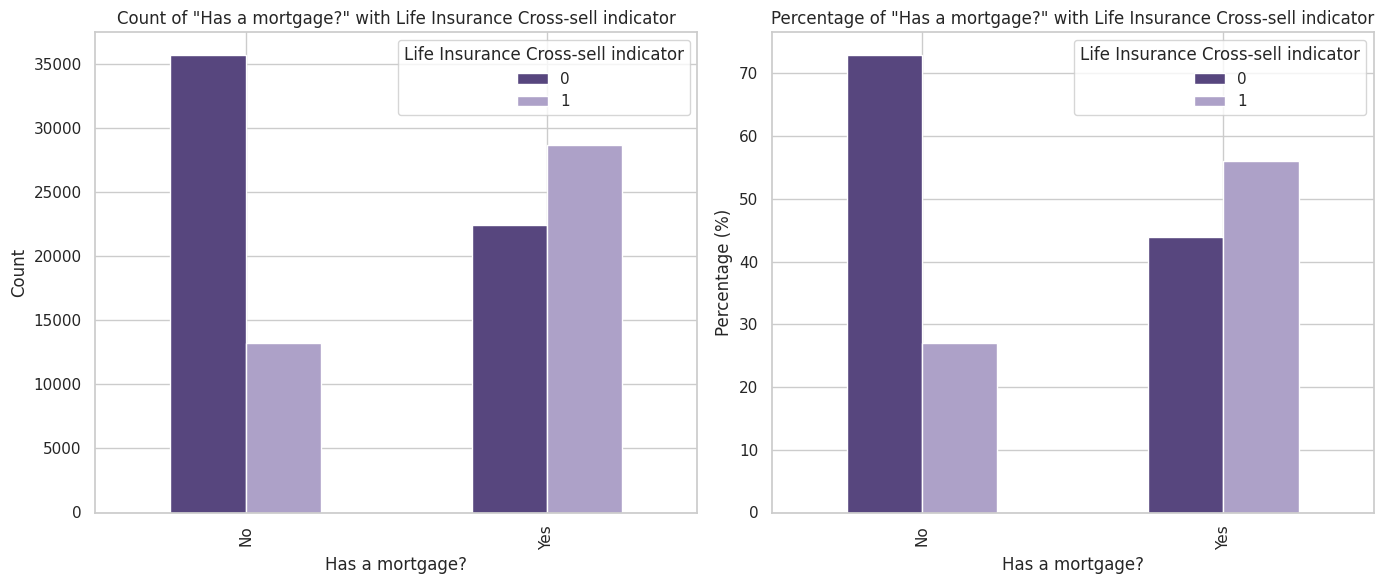

In [ ]:
# Plot count and percentage of "Has a mortgage?" with "Life Insurance Cross-sell indicator"
cross_sell_mortgage = pd.crosstab(data['Has a mortgage?'], data['Life Insurance Cross-sell indicator'])

# Create a figure with two subplots for count and percentage
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for cross-selling by mortgage status
cross_sell_mortgage.plot(kind='bar', stacked=False, ax=axes[0], color=['#57467e', '#ada1c8'])
axes[0].set_title('Count of "Has a mortgage?" with Life Insurance Cross-sell indicator')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Has a mortgage?')

# Percentage plot for cross-selling by mortgage status
cross_sell_mortgage_percentage = cross_sell_mortgage.div(cross_sell_mortgage.sum(axis=1), axis=0) * 100
cross_sell_mortgage_percentage.plot(kind='bar', stacked=False, ax=axes[1], color=['#57467e', '#ada1c8'])
axes[1].set_title('Percentage of "Has a mortgage?" with Life Insurance Cross-sell indicator')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Has a mortgage?')

plt.tight_layout()
plt.show()

In [ ]:
# 5. Number of Website Logins vs. Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x="Life Insurance Cross-sell indicator", y="Number of website logins (past year)", data=data, palette="Purples")
plt.title("Website Logins vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Life Insurance Cross-sell Indicator")
plt.ylabel("Number of Website Logins (Past Year)")
plt.show()

In [ ]:
# 6. Number of Car Accidents vs. Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.countplot(x="Number of car accidents", hue="Life Insurance Cross-sell indicator", data=data, palette="Purples")
plt.title("Number of Car Accidents vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Number of Car Accidents")
plt.ylabel("Count")
plt.legend(title="Cross-sell Indicator", loc="upper right")
plt.show()

In [ ]:
# 7. Annual Car Insurance Premium vs. Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x="Life Insurance Cross-sell indicator", y="Annual car insurance premium", data=data, palette="Purples")
plt.title("Car Insurance Premium vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Life Insurance Cross-sell Indicator")
plt.ylabel("Annual Car Insurance Premium ($)")
plt.show()

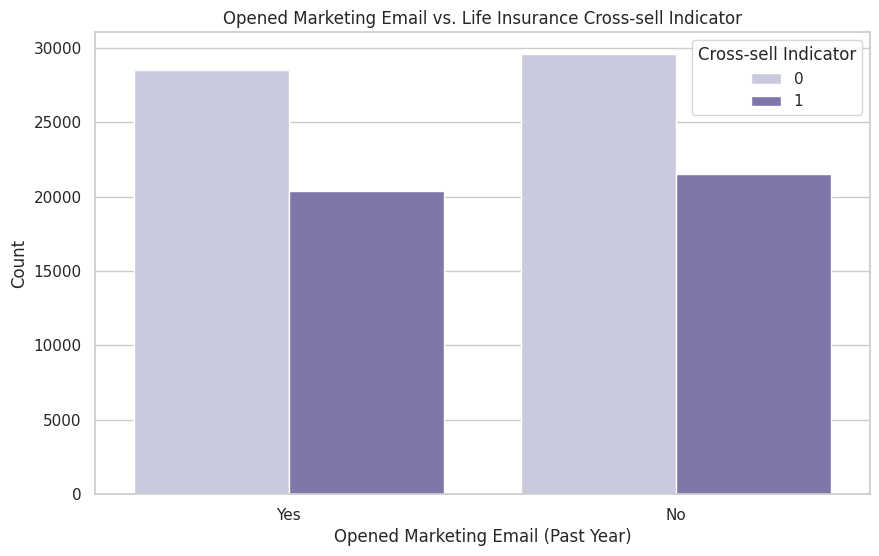

In [ ]:
# 8. Opened Marketing Email vs. Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.countplot(x="Opened marketing email? (past year)", hue="Life Insurance Cross-sell indicator", data=data, palette="Purples")
plt.title("Opened Marketing Email vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Opened Marketing Email (Past Year)")
plt.ylabel("Count")
plt.legend(title="Cross-sell Indicator", loc="upper right")
plt.show()

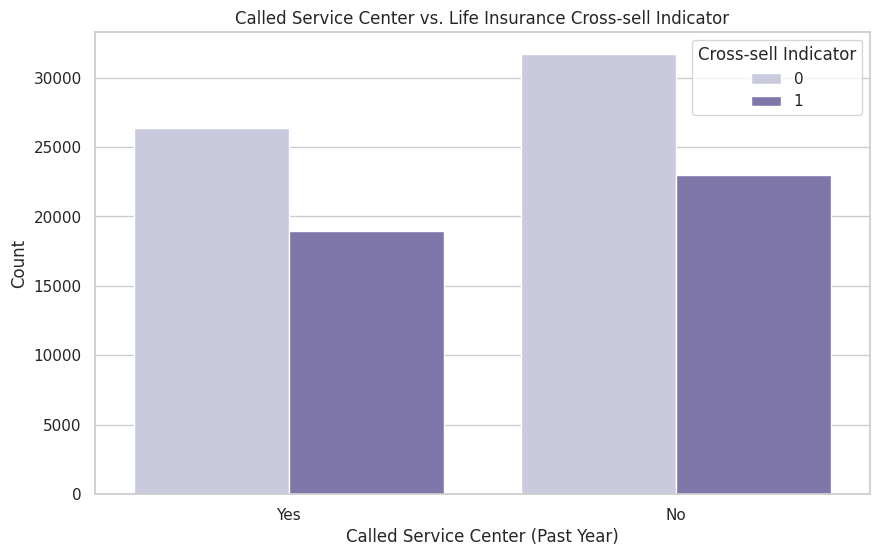

In [ ]:
# 9. Called Service Center vs. Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.countplot(x="Called service center? (past year)", hue="Life Insurance Cross-sell indicator", data=data, palette="Purples")
plt.title("Called Service Center vs. Life Insurance Cross-sell Indicator")
plt.xlabel("Called Service Center (Past Year)")
plt.ylabel("Count")
plt.legend(title="Cross-sell Indicator", loc="upper right")
plt.show()

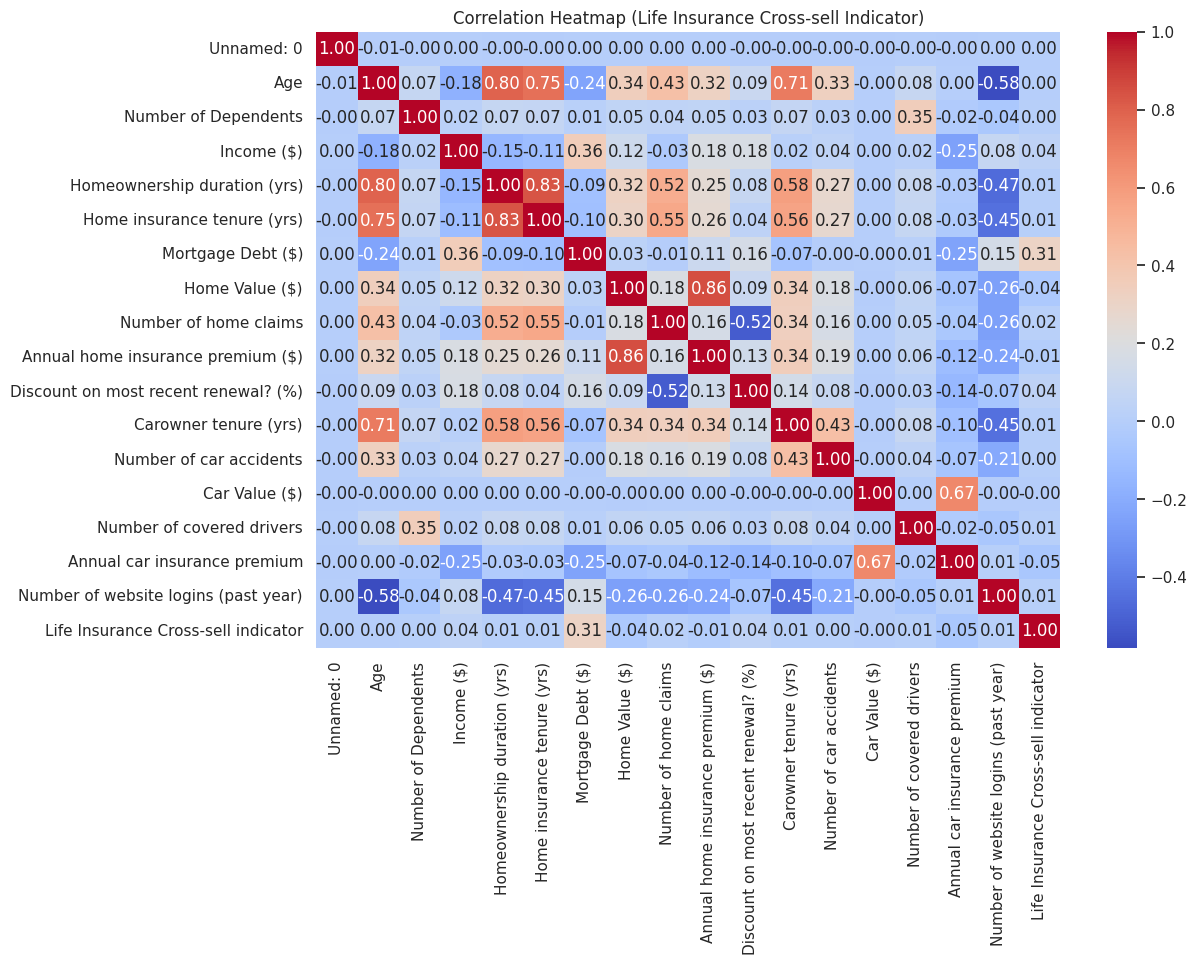

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_data = data.select_dtypes(include=["int64", "float64"]).corr()
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Life Insurance Cross-sell Indicator)")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


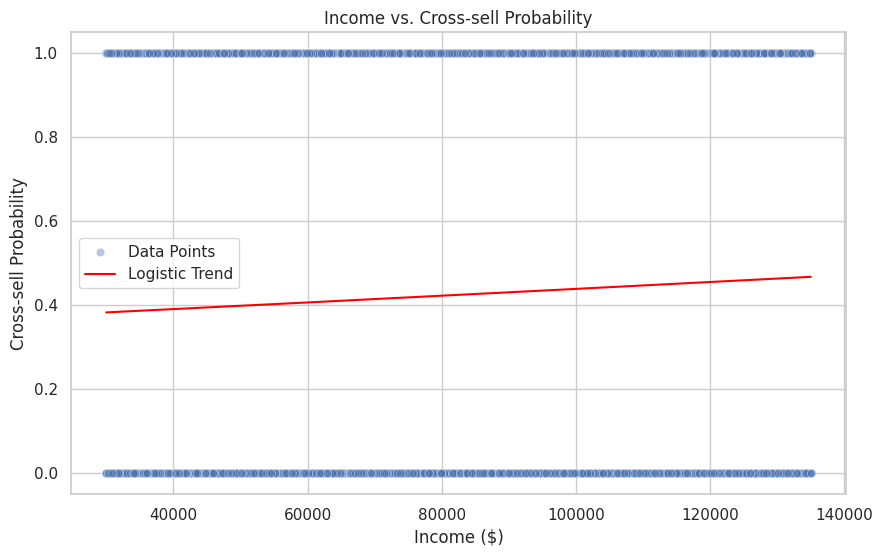

In [ ]:
# 3. Logistic Regression Trend Line (Income vs. Cross-sell Indicator)
from sklearn.linear_model import LogisticRegression

# Prepare income data for logistic regression
X_income = data["Income ($)"].values.reshape(-1, 1)
y_cross_sell = data["Life Insurance Cross-sell indicator"].values

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_income, y_cross_sell)

# Generate trendline predictions
income_range = np.linspace(X_income.min(), X_income.max(), 1000).reshape(-1, 1)
income_pred = log_reg.predict_proba(income_range)[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Income ($)", y="Life Insurance Cross-sell indicator", data=data, alpha=0.4, label="Data Points")
plt.plot(income_range, income_pred, color="red", label="Logistic Trend")
plt.title("Income vs. Cross-sell Probability")
plt.xlabel("Income ($)")
plt.ylabel("Cross-sell Probability")
plt.legend()
plt.show()

# PREDICTIVE MODEL
**GOAL**: USE LOGISTIC REGRESSION TO MAKE A CLASSIFIER THAT ACCURATELY AND EFFICIENTLY PREDICTS THE CROSS SELLING INDICATOR

notes about model and ideas
- bagging models are best to improve high variance models with noisy or complex data
  - reduces variance of the model and can prevent overfitting

In [ ]:
import numpy as np; seed = 1604; np.random.seed(seed)
import warnings; warnings.filterwarnings('ignore')
import pandas as pd; pd.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import OneHotEncoder

# read case dta csv file
df = pd.read_csv("/content/drive/MyDrive/Case_Data.csv")
df.head()

# print tail
display(df.tail())

# print info
df.describe()
df.info()

# print shape
nRows, nCols = df.shape # inspect dimension of df
print("num rows: " , nRows, "num cols: ", nCols)
# there are 30 features and 9999 individuals / observations


# which covariates are irrelevent ?
  # I assume Inception Date,	Effective Date are not  important

# no na values seemingly but we can use this method to drop any if i missed something
df = df.dropna().reset_index(drop=True) # drop na rows

# Identify categorical columns
categoricalColumns = df.select_dtypes(include=['object']).columns

dfEncoded = df.copy()

# remove the covariates that are irrelevent
#dfEncoded = dfEncoded.drop(columns=["Effective Date", "Inception Date",  "Homeownership duration (yrs)"])

dfEncoded = pd.get_dummies(dfEncoded, columns=['Marital Status'], drop_first=True)
dfEncoded.head()

# Turn all categorical data into numeric variables
column_names = dfEncoded.columns
print(column_names)

,Unnamed: 0,Age,Gender,Marital Status,Number of Dependents,Income ($),Employment,Homeownership duration (yrs),Home insurance tenure (yrs),Has a mortgage?,Mortgage Debt ($),Home Value ($),Number of home claims,Home coverage,Annual home insurance premium ($),Inception Date,Effective Date,Renewal Status,Discount on most recent renewal? (%),Carowner tenure (yrs),Number of car accidents,Car Value ($),Car coverage,Number of covered drivers,Annual car insurance premium,Number of website logins (past year),Called service center? (past year),Opened marketing email? (past year),Family with life policies?,Life Insurance Cross-sell indicator
99994,99994,56,Female,Married,2,62047,Employed,30,20,No,0,1888094,1,Comprehensive,2455,2004-12-29,2024-12-29,Renewed,13,15,4,34999,All Perils,1,2461,2,Yes,No,Yes,0
99995,99995,61,Female,Married,2,86986,Employed,30,17,No,0,960219,3,Standard,2085,2007-07-05,2024-07-05,Renewed,0,25,6,31601,Collision,1,2487,1,No,Yes,Yes,1
99996,99996,25,Female,Married,2,37388,Self-Employed,0,0,No,0,366389,0,Standard,964,2024-02-02,2024-02-02,Renewed,0,4,2,22957,Comprehensive,3,2398,4,No,Yes,No,0
99997,99997,42,Male,Married,3,107214,Self-Employed,18,7,No,0,940142,0,Comprehensive,1824,2017-10-30,2024-10-30,Renewed,29,15,3,18241,Comprehensive,2,2161,7,Yes,Yes,Yes,0
99998,99998,38,Female,Other,2,70581,Employed,18,12,Yes,554539,781539,0,Comprehensive,2107,2012-04-30,2024-04-30,Renewed,15,6,3,23374,All Perils,1,2094,5,No,Yes,Yes,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Unnamed: 0                            99999 non-null  int64 
 1   Age                                   99999 non-null  int64 
 2   Gender                                99999 non-null  object
 3   Marital Status                        99999 non-null  object
 4   Number of Dependents                  99999 non-null  int64 
 5   Income ($)                            99999 non-null  int64 
 6   Employment                            99999 non-null  object
 7   Homeownership duration (yrs)          99999 non-null  int64 
 8   Home insurance tenure (yrs)           99999 non-null  int64 
 9   Has a mortgage?                       99999 non-null  object
 10  Mortgage Debt ($)                     99999 non-null  int64 
 11  Home Value ($)              

In [ ]:
# TO MAKE A MODEL WITH ALL THE FEATURES USE THIS INPLACE OF X =
#    X = data.drop('Life Insurance Cross-sell Indicator', axis = 'columns')


to improve the model
- use cross validation to find the optimal combination of features

- use some method to choose ideal threshold



Text(0, 0.5, 'Age')

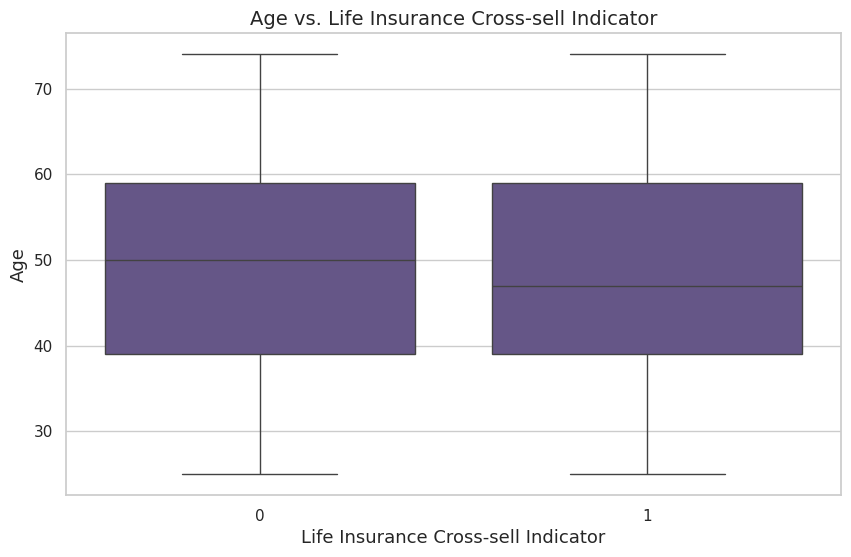

In [ ]:
# Plot: Age vs. Life Insurance Cross-sell Indicator
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Life Insurance Cross-sell indicator",
    y="Age",
    data=df,
    color="#624e8f"  # Muted purple color (Hex code for Medium Purple)
)
plt.title("Age vs. Life Insurance Cross-sell Indicator", fontsize=14)
plt.xlabel("Life Insurance Cross-sell Indicator", fontsize=13)
plt.ylabel("Age", fontsize=13)


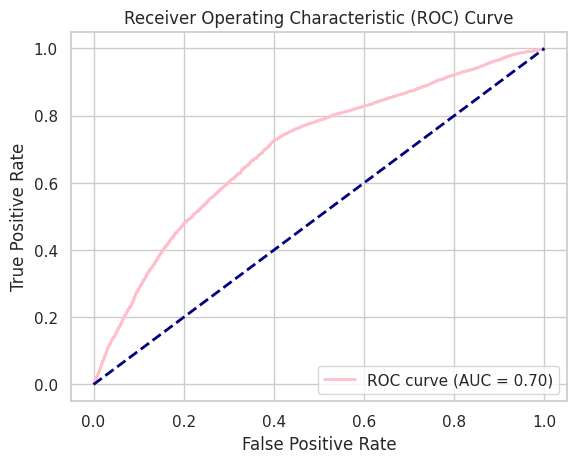

Classification Report:
               precision    recall  f1-score   support

No Cross-sell       0.67      0.83      0.74     11576
   Cross-sell       0.65      0.44      0.52      8424

     accuracy                           0.66     20000
    macro avg       0.66      0.63      0.63     20000
 weighted avg       0.66      0.66      0.65     20000

Confusion Matrix:
[[9556 2020]
 [4751 3673]]


In [ ]:
# Lets see if we can improve with feature engineering and a penalty
seed = 42
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.metrics import classification_report

dfEncoded['Engagement_Score'] = (
    dfEncoded['Number of website logins (past year)'] +
    (dfEncoded['Called service center? (past year)'] == 'Yes').astype(int) +
    (dfEncoded['Opened marketing email? (past year)'] == 'Yes').astype(int)
)

# income and age - old people with money may behave differently than young people with money etc...
dfEncoded['Income_Age_Interaction'] = dfEncoded['Income ($)'] * dfEncoded['Age']

# adding bins for age may help us to identify trends more easily
dfEncoded['Age_Bracket'] = pd.cut(dfEncoded['Age'], bins=[0, 25, 40, 60, 80, 100], labels=False)

#Age Squared: Older customers might have diminishing probability (less of them), so adding a nonlinear term can help:
dfEncoded['Age_Squared'] = dfEncoded['Age'] ** 2


dfEncoded['Total_Insurance_Premium'] = dfEncoded['Annual home insurance premium ($)'] + dfEncoded['Annual car insurance premium']

dfEncoded['Policy_Tenure'] = (pd.to_datetime(dfEncoded['Effective Date']) - pd.to_datetime(dfEncoded['Inception Date'])).dt.days

dfEncoded['Engagement_Income_Interaction'] = dfEncoded['Engagement_Score'] * dfEncoded['Income ($)']

# more than 1 dependent maybe is more sig than each individual number
dfEncoded['Dependents_Indicator'] = (dfEncoded['Number of Dependents'] > 0).astype(int)

dfEncoded['Debt_to_Income_Ratio'] = dfEncoded['Mortgage Debt ($)'] / (dfEncoded['Income ($)'] + 1e-5)

chosenFeatures = ["Income ($)","Dependents_Indicator", "Age", "Mortgage Debt ($)"]

X = dfEncoded[chosenFeatures].values
y = dfEncoded["Life Insurance Cross-sell indicator"].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state=seed)

logreg2 = LogisticRegression(penalty='l1', solver='liblinear')  # L1 for sparsity
logreg2.fit(Xtrain, ytrain)

# we can now use the test set to test and then imrpove the model
# Predict for all new data points
preds = logreg2.predict(Xtest)
predProbs = logreg2.predict_proba(Xtest)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(ytest, predProbs)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Evaluate the model
print("Classification Report:")
print(classification_report(ytest, preds, target_names=['No Cross-sell', 'Cross-sell']))

print("Confusion Matrix:")
print(confusion_matrix(ytest, preds))

def classify_customer(model, data_point, optimal_threshold):
    """
    Classify a single customer based on their features.

    Parameters:
        model (LogisticRegression): Trained logistic regression model.
        data_point (array-like): Features of the customer.
        optimal_threshold (float): Optimal classification threshold.

    Returns:
        str: Classification result ("Cross-sell" or "No Cross-sell").
        float: Probability of cross-selling.
    """
    prob = model.predict_proba([data_point])[0, 1]  # Probability of class 1
    prediction = "Cross-sell" if prob >= optimal_threshold else "No Cross-sell"
    return prediction, prob


#["Income ($)", "Age", "Mortgage Debt ($)", "Income_Age_Interaction","Number of Dependents" ]

# Example new customer data
new_customer = [75000, 70, 700000, 75000 * 70, 2]  # Example feature values

# Use the function to classify
#result, probability = classify_customer(logreg2, new_customer, optimal_threshold)

# Output
#print(f"Prediction: {result}, Prob#ability of Cross-sell: {probability:.2f}")




AUC: 0.71


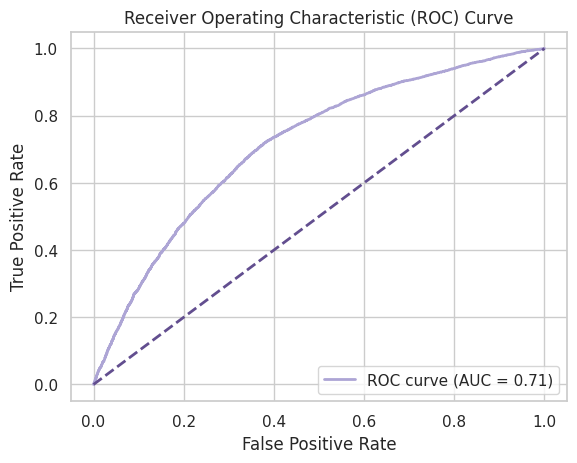

Classification Report:
               precision    recall  f1-score   support

No Cross-sell       0.75      0.62      0.68     11576
   Cross-sell       0.58      0.72      0.64      8424

     accuracy                           0.66     20000
    macro avg       0.67      0.67      0.66     20000
 weighted avg       0.68      0.66      0.66     20000

Confusion Matrix:
[[7156 4420]
 [2345 6079]]


In [ ]:
# XGBOOST

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(Xtrain, ytrain)

# Predict probabilities for the test set
predProbs = xgb_model.predict_proba(Xtest)[:, 1]

# Compute ROC curve and find the optimal threshold
fpr, tpr, thresholds = roc_curve(ytest, predProbs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Print the AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='#ada5d5', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='#624e8f', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Classify based on the optimal threshold
custom_preds = (predProbs >= optimal_threshold).astype(int)

# Evaluate the model
print("Classification Report:")
print(classification_report(ytest, custom_preds, target_names=['No Cross-sell', 'Cross-sell']))

print("Confusion Matrix:")
print(confusion_matrix(ytest, custom_preds))

# Define the classify_customer function for XGBoost
def classify_customer(model, data_point, optimal_threshold):
    """
    Classify a single customer based on their features using an XGBoost model.

    Parameters:
        model (xgb.XGBClassifier): Trained XGBoost model.
        data_point (array-like): Features of the customer.
        optimal_threshold (float): Optimal classification threshold.

    Returns:
        str: Nicely formatted string with the classification result and probability.
    """
    # Get the probability of class 1 (cross-sell)
    prob = model.predict_proba([data_point])[0, 1]

    # Classify based on the optimal threshold
    prediction = "Cross-sell" if prob >= optimal_threshold else "No Cross-sell"

    # Return the result as a nicely formatted string
    return prediction, prob



    #return f"Prediction: {prediction}\nProbability of Cross-sell: {prob:.2%}"





In [ ]:
# Classifier
#["Income ($)","Dependents_Indicator", "Age", "Mortgage Debt ($)", "Income_Age_Interaction"]
print("Hello, welcome to our cross selling classifier.")

#
income = int(input("Please enter client income: "))
dep = int(input("Please enter if the client has dependents (0/1): "))
age = int(input("Please enter client age: "))
debt = int(input("Please enter client mortgage debt "))

print("Generating probability...")

clientData = [income, dep, age, debt]
pred, prob = classify_customer(xgb_model, clientData, optimal_threshold)

def probBracket(prob):
  # if the porbability of cross sell is:
  # 0 -33 low
  # 34 - 70 med
  # 71 + high
  if prob <= 0.33:
    return "low Probability"
  elif prob <= 0.7:
    return "medium Probability"
  else:
    return "high Probability"

bracket = probBracket(prob)
print("/The client has a " + bracket + " of buying life insurance.")
print("/With a probability of " + str(prob) + ".")
print("/Expected outcome: " + pred + ".")





Hello, welcome to our cross selling classifier.
